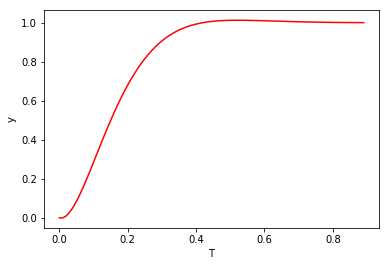

In [7]:
# state-based simulation equation:
# x_dot = A.x + B.u
# y = C.x + D.u
# e.g., u = -(k.T).x. u can be a non-linear 

import numpy as np
import matplotlib.pyplot as plt
k = np.matrix([[0],[1]])
def con(y, s, x):
    return -1 * (y - s)
#print con(0, 0.5, 0)

def closedLoop(y, s, x):
    # fill-in K matrix here:
    K
    return -K*x
#print con(0, 0.5, 0)


def simulate(A, B, C, D, regulator_func, s, T, x0=0):
    #intitialize y, u
    y = np.zeros(len(T))    
    u = np.zeros((len(T),np.size(x0,1)))    
    if type(x0) is int:
        xt = np.matrix([x0]*len(A)).T
        print "x0 = \n{}".format(xt)
    else:
        xt = x0
    #print "y.shape = \n",y.shape
    #print "len(T) = \n",len(T)
    #print "A.shape = \n",(A).shape
    #print "xt.shape = \n",(xt).shape
    #print "B.shape = \n",(B).shape
    #print "u.shape = \n",u.shape
    #print "s.shape = \n",s.shape
    #print "C.T.shape = \n",C.T.shape
    #print "D.shape = \n",D.shape
    
    for i, t in enumerate(T):
        #print "regulator_func = \n",(regulator_func(y[i], s[i],xt))
        u[[i],:] = regulator_func(y[i], s[i],xt)
        x_dot = A.dot(xt) + B.dot(u[[i],:])
        #print "x_dot = \n",x_dot
        #print "(C.T).dot(xt) = \n",((C.T).dot(xt)).shape
        #print " D.dot(u[[i],:]) = \n",(D.dot(u[[i],:])).shape
        #print "(C.T).dot(xt) + D.dot(u[[i],:]) = \n",((C.T).dot(xt) + D.dot(u[[i],:])).shape
        y[[i]] = (C).dot(xt) + D.dot(u[[i],:])
        #print "y[[i]] = \n",y[[i]]
        if i < len(T)-1:
            xt = xt + x_dot*(T[i+1]-T[i])
        #print "y[[i]] = \n",y[[i]] 
    return y, u
 
 
#A = np.matrix([[0, 1, 0],
#               [-10, -1.167, 25],
#               [0, 0, -0.8]]) # A: 3x3 matrix
#B = np.matrix([[0], [0], [2.4]]) # e.g., B: 3x1 matrix
#C = np.matrix([1, 0, 0]) # e.g., C: 3x1 matrix
#D = np.matrix([[0]]) # e.g., D: 1x2 matrix

A = np.matrix([[0., -10.],
               [10., -16.6]])
#A = np.matrix(np.zeros((A.shape)))
#print "A = \n",A
B = np.matrix([[-10.], [0.]]) 
C = np.matrix([0., -1.])
D = np.matrix([[0.]])

T = np.arange(0, 0.9, 0.01) 
s = np.ones(len(T))
#s = np.append(1, np.zeros(len(T)-1))
x0 = np.matrix([[0.0], [0.0]])
#x0 = np.matrix([[20], [10], [10]])

# anonymous function for just outputing s directly (is this open loop then?)
# yes <3
inputSignal = lambda y,s,x: s
regulator_func = inputSignal

y, u = simulate(A, B, C, D, regulator_func, s, T, x0)

plt.figure()
plt.plot(T, y, 'r')
plt.xlabel('T')
plt.ylabel('y')
plt.show()

In [5]:
import numpy
import matplotlib.pyplot as plt
import control as con

# pt2 System
K = 1
d = 0.83
T = .1
delay = 0.246

a0 = 1
a1 = (2 * d * T) #16
a2 = (T**2) #100
b0 = K

# Polynom
tf_pt2 = con.matlab.tf(K, [a2, a1, a0])

# Zustandsraum
ss = con.matlab.tf2ss(tf_pt2)
print "tf_pt2.C", ss.C
Q = (numpy.matrix.getH(ss.C)).dot(ss.C)
print "Q.shape", Q.shape
R = numpy.diag([1, 1]);
(K, S, E) = con.statefbk.lqr(ss.A,ss.B,Q,R)
print ss

CL = con.feedback(ss, 1);

yout2, T2 = con.matlab.step(tf_pt2) # step open loop
plt.plot(T2, yout2, 'r-', label='open')

yout2, T2 = con.matlab.step(CL) # step closed loop
plt.plot(T2, yout2, 'b-', label='closed')



tf_pt2.C [[  0. 100.]]
Q.shape (2, 2)


ControlSlycot: can't find slycot module 'sb02md' or 'sb02nt'